## Classificação - Respondendo a pergunta 3: Uma música ou artista influencia similares a subirem no  top 100?

Avaliação utilizando KNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report


In [2]:
df_with_one_hot = pd.read_csv('../dataset/songs_one_hot_encoding.csv',
                 encoding='iso-8859-1', na_values='unknown')

In [3]:
#define X e Y de treino e teste

train, test = train_test_split(df_with_one_hot, test_size=0.50)

X_train = train[['pop', 'dance pop', 'pop rap',
       'rap', 'post-teen pop', 'hip hop', 'r&b', 'contemporary country',
       'southern hip hop', 'country', 'country road', 'urban contemporary',
       'hip pop', 'trap music', 'weeks', 'rank', 'tempo', 'speechiness', 'acousticness',
       'loudness',
       'valence', 'mode']]
X_test = test[['pop', 'dance pop', 'pop rap',
       'rap', 'post-teen pop', 'hip hop', 'r&b', 'contemporary country',
       'southern hip hop', 'country', 'country road', 'urban contemporary',
       'hip pop', 'trap music', 'weeks', 'rank', 'tempo', 'speechiness', 'acousticness',
       'loudness',
       'valence', 'mode']]

Y_train = train[['peak_pos']]
Y_test = test[['peak_pos']]

In [4]:
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

In [5]:
#divide em 5 grupos[1[1-20], 2[21-40], 3[41,60], 4[61,80], 5[81,100]]

Y_train = Y_train - 1
Y_train = Y_train // 20
Y_train = Y_train + 1
Y_test = Y_test - 1
Y_test = Y_test // 20
Y_test = Y_test+ 1

In [6]:
skf = StratifiedKFold(n_splits=20, shuffle=True)

In [7]:
fold = 0
best = []
for training, validation in skf.split(X_train, Y_train):
    X_tt = X_train[training]
    y_tt = Y_train[training]
    X_v = X_train[validation]
    y_v = Y_train[validation]
    best_iter = (0, 0)
    for nn in [2, 3, 4, 5, 6, 7, 8, 9, 10, 20]: # Vamos testar tais valores de n
        model = KNeighborsClassifier(n_neighbors=nn)
        model.fit(X_tt, y_tt) # treina no conjunto de treino
        y_pv = model.predict(X_v) # previsões no conjunto de validação
        
        # Resultado com melhor acurácia!
        accuracy = accuracy_score(y_v, y_pv)
        if accuracy > best_iter[0]:
            best_iter = (accuracy, nn)
    
    best.append(best_iter[1])
    fold += 1

In [8]:
intMedian = int(np.median(best))

modelKNN = KNeighborsClassifier(n_neighbors=intMedian)
modelKNN.fit(X_train, Y_train)

print(classification_report(Y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           1       0.77      0.71      0.74       856
           2       0.43      0.39      0.41       633
           3       0.42      0.43      0.43       653
           4       0.52      0.49      0.51       667
           5       0.69      0.82      0.75       696

    accuracy                           0.58      3505
   macro avg       0.56      0.57      0.57      3505
weighted avg       0.58      0.58      0.58      3505



([<matplotlib.axis.YTick at 0x25cb1f2c668>,
 <a list of 5 Text yticklabel objects>)

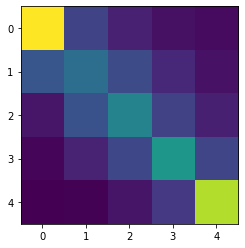

In [9]:
values=np.arange(5)

plt.imshow(confusion_matrix(Y_test, modelKNN.predict(X_test)))
plt.xticks(values)
plt.yticks(values)

Por esse primeiro modelo, percebemos que os resultados para músicas nos grupos 1(top 20) e 5 (bottom 20) são satisfatórios, mas as músicas nos grupos do meio mostram maior confusão pelo algoritmo<br><br>

A seguir, vamos dividir em três grupos(top 20, 21-80, bottom 20) para tentar reduzir esse erro unificando o conjunto com maior confusão.

In [10]:
def classifier(pos):
    if (pos < 21):
        return 0
    if (pos < 81):
        return 1
    return 2

df_with_one_hot['peak_pos'] = list(map(classifier, df_with_one_hot['peak_pos']))
df_with_one_hot.head()

,date,title,artist,peak_pos,pop,dance pop,pop rap,rap,post-teen pop,hip hop,...,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
0,6/21/18,all girls are the same,juice wrld,1,0,0,0,1,0,0,...,0.3070,0.0769,0.000335,4.0,0.671,0.0,165820.0,-7.226,0.203,1.0
1,6/21/18,all mine,kanye west,0,0,0,1,1,0,0,...,0.3380,0.1250,0.000000,4.0,0.925,11.0,145507.0,-6.562,0.265,0.0
2,6/21/18,back to you,selena gomez,1,1,1,0,0,1,0,...,0.0486,0.0945,0.000002,4.0,0.601,6.0,207905.0,-4.856,0.508,1.0
3,6/21/18,be careful,cardi b,0,1,0,0,1,0,0,...,0.4110,0.0256,0.000000,4.0,0.820,6.0,210787.0,-8.230,0.535,0.0
4,6/21/18,beautiful crazy,luke combs,1,0,0,0,0,0,0,...,0.0262,0.6760,0.000000,4.0,0.552,11.0,193200.0,-7.431,0.382,1.0


In [11]:
#define X e Y de treino e teste

train, test = train_test_split(df_with_one_hot, test_size=0.50)

X_train = train[['pop', 'dance pop', 'pop rap',
       'rap', 'post-teen pop', 'hip hop', 'r&b', 'contemporary country',
       'southern hip hop', 'country', 'country road', 'urban contemporary',
       'hip pop', 'trap music', 'weeks', 'rank', 'tempo', 'speechiness', 'acousticness',
       'loudness',
       'valence', 'mode']]
X_test = test[['pop', 'dance pop', 'pop rap',
       'rap', 'post-teen pop', 'hip hop', 'r&b', 'contemporary country',
       'southern hip hop', 'country', 'country road', 'urban contemporary',
       'hip pop', 'trap music', 'weeks', 'rank', 'tempo', 'speechiness', 'acousticness',
       'loudness',
       'valence', 'mode']]

Y_train = train[['peak_pos']]
Y_test = test[['peak_pos']]

In [12]:
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

In [13]:
skf = StratifiedKFold(n_splits=20, shuffle=True)

In [14]:
fold = 0
best = []
for training, validation in skf.split(X_train, Y_train):
    X_tt = X_train[training]
    y_tt = Y_train[training]
    X_v = X_train[validation]
    y_v = Y_train[validation]
    best_iter = (0, 0)
    for nn in [2, 3, 4, 5, 6, 7, 8, 9, 10, 20]: # Vamos testar tais valores de n
        model = KNeighborsClassifier(n_neighbors=nn)
        model.fit(X_tt, y_tt) # treina no conjunto de treino
        y_pv = model.predict(X_v) # previsões no conjunto de validação
        
        # Resultado com melhor acurácia!
        accuracy = accuracy_score(y_v, y_pv)
        if accuracy > best_iter[0]:
            best_iter = (accuracy, nn)
    
    best.append(best_iter[1])
    fold += 1

In [15]:
intMedian = int(np.median(best))

modelKNN = KNeighborsClassifier(n_neighbors=intMedian)
modelKNN.fit(X_train, Y_train)

print(classification_report(Y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75       856
           1       0.81      0.82      0.82      1993
           2       0.70      0.76      0.73       656

    accuracy                           0.78      3505
   macro avg       0.77      0.76      0.77      3505
weighted avg       0.79      0.78      0.78      3505



([<matplotlib.axis.YTick at 0x25cb226f2e8>,
 <a list of 3 Text yticklabel objects>)

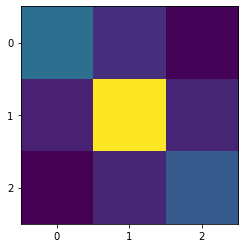

In [16]:
values=np.arange(3)

plt.imshow(confusion_matrix(Y_test, modelKNN.predict(X_test)))
plt.xticks(values)
plt.yticks(values)

Pela matriz de confusão é possível pensar que o primeiro e último grupo aparentaram uma piora na predição, mas o relatório mostra que isso não é verdade, e ambos aparentaram resultado similar, enquanto o grupo do meio demonstrou uma melhora muito grande, o que levou a uma alta na porcentagem de acerto na predição.